# Create Figure 1 Notebook: EGFR

This notebooks makes figure 1. It shows the mutation type abundance for the different cancer 

In [1]:
import cptac
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_utils as p


/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 1 Create data frames with Mutation Types 

For each cancer type we need to create a df that has the mutation type for each sample 


First, load in cptac datasets

In [2]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
lscc = cptac.Lscc()

cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


In [55]:
def figure1_plot_mutations(dflist = None, names_of_df=None, title=None, save_to_path=None):
    number_of_df = len(dflist)

    allLabels = []
    for df in dflist:
        #get the labels for each and make a combined label that they'll all use
        mutation = df["Mutation"]
        labels = list(set(mutation))

        allLabels.append(labels)

    flat_list = [item for sublist in allLabels for item in sublist]
    all_labels = list(set(flat_list))
    all_labels.sort()
    allLabels = all_labels

#     For each df, add na to their labels if it doesn't exist in all_labels
    labels_for_each_df = []
    frequencies_for_each_df = []
    for df in dflist:
        mutation = df["Mutation"].tolist()
        mutationlist = list(set(mutation))
        mutationlist.sort()
        ordered_mut_list = []
        match = True
        mutPosition = 0

        for position in range(len(all_labels)):
            try:

                if mutationlist[mutPosition] == all_labels[position]:
                    ordered_mut_list.append(mutationlist[mutPosition])
                    mutPosition += 1

                else:
                    ordered_mut_list.append("na")

            except IndexError:
                ordered_mut_list.append("na")


        labels_for_each_df.append(ordered_mut_list)

        #get the freq of each mutation type
        freq = []
        for mutation_type in ordered_mut_list:
            freq.append(mutation.count(mutation_type))

        PercentFreq = [x*100 / sum(freq) for x in freq]
        frequencies_for_each_df.append(PercentFreq)


    #Now plot it using arrays
    width = 0.1
    x = np.arange(len(allLabels))
    a4_dims = (25, 13) #dimensions for bigger plot
    fig, ax = plt.subplots(figsize=a4_dims)
    for position in range(0, number_of_df):
        r = ax.bar(x+(width*position), frequencies_for_each_df[position], width,label=names_of_df[position], alpha=.5, linewidth=0)



    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(allLabels, size = 20)
    ax.set_ylim(0,100)
    plt.ylabel('Percent_Sample', size = 20)
    ax.legend(prop={'size': 20})
    ax.yaxis.set_tick_params(labelsize=17)



    plt.setp(ax.get_xticklabels(),rotation= 45)
    plt.tight_layout()
    if save_to_path == None:
        plt.savefig("step_1.png",dpi = 300)
    else:
        plt.savefig(save_to_path)

    plt.show()


Second, call get_geneotype_all_vars for EGFR for each cancer type. This returns a df with mutation, location, and mutation_status. 

In [56]:
endo = en.get_genotype_all_vars("EGFR")
gbm = g.get_genotype_all_vars("EGFR")
hnscc = hn.get_genotype_all_vars("EGFR")
ovar = o.get_genotype_all_vars("EGFR")
cc = c.get_genotype_all_vars("EGFR")
colon = col.get_genotype_all_vars("EGFR")
ld = l.get_genotype_all_vars("EGFR")
brca = b.get_genotype_all_vars("EGFR")
lscc = lscc.get_genotype_all_vars("EGFR")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 91 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 107 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python

AttributeError: 'DataFrame' object has no attribute 'get_genotype_all_vars'

In [57]:
lscc

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00081,Amplification,Amplification,Single_mutation
C3L-00415,Amplification,Amplification,Single_mutation
C3L-00445,Amplification,Amplification,Single_mutation
C3L-00568,Truncating,p.S885*,Single_mutation
C3L-00603,Wildtype_Tumor,No_mutation,Wildtype_Tumor
...,...,...,...
C3N-03886,Deletion,Deletion,Single_mutation
C3N-04124,Amplification,Amplification,Single_mutation
C3N-04127,Wildtype_Tumor,No_mutation,Wildtype_Tumor


# Step 2: Match Mutation Labels

The Colon data set labeled their mutations slightly differently. Nonsynonymous snv in this case is also a missense mutation. I also changed nonframeshift insertion to match In_Frame_Del formating 

In [58]:
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense_Mutation')
#Drop Silent mutation type
indexNames = hnscc[ hnscc['Mutation'] == "Silent" ].index
hnscc.drop(indexNames , inplace=True)
indexNames = ld[ ld['Mutation'] == "Silent" ].index
ld.drop(indexNames , inplace=True)
indexNames = brca[ brca['Mutation'] == "Silent" ].index
brca.drop(indexNames , inplace=True)


In [59]:
#combine to make indel mutation type 
ovar["Mutation"] = ovar['Mutation'].replace(['In_Frame_Del'], 'In_Frame_Indel')
ld["Mutation"] = ld['Mutation'].replace(['In_Frame_Del'], 'In_Frame_Indel')
lscc["Mutation"] = lscc['Mutation'].replace(['In_Frame_Del'], 'In_Frame_Indel')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'In_Frame_Indel')
#combine to make truncation muatation type
endo["Mutation"] = endo['Mutation'].replace(['Nonsense_Mutation'], 'Truncating')

lscc["Mutation"] = lscc['Mutation'].replace(['Nonsense_Mutation'], 'Truncating')


# Step 3: Create figure 

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function

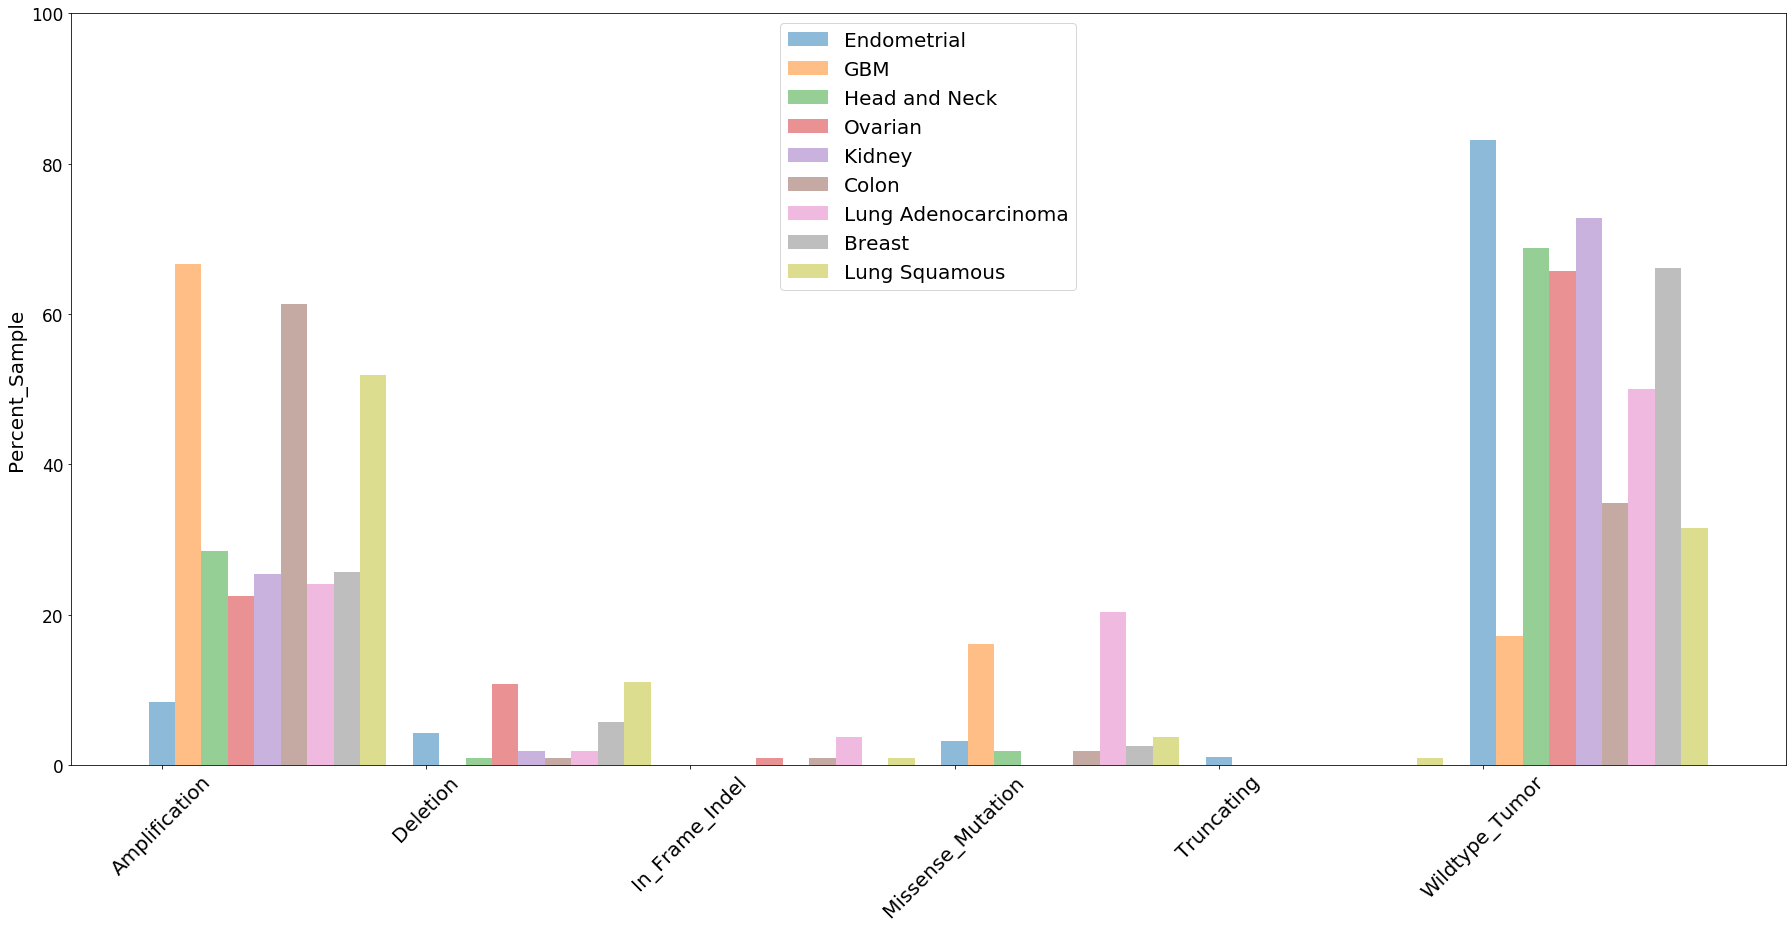

In [60]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'GBM', 'Head and Neck', 'Ovarian', 'Kidney', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
figure1_plot_mutations(dfs, names, save_to_path = "Step1_EGFR.png")

In [54]:
lscc

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00081,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3L-00415,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3L-00445,Amplification,Amplification,Single_mutation
C3L-00568,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3L-00603,Wildtype_Tumor,No_mutation,Wildtype_Tumor
...,...,...,...
C3N-03886,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3N-04124,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3N-04127,Wildtype_Tumor,No_mutation,Wildtype_Tumor


In [67]:
i = 0
for df in dfs:
    print(names[i] + " %AMP")
    print(sum(df.Mutation.isin(mut))/len(df.Mutation.isin(mut))) 
    i +=1

Endometrial %AMP
0.08421052631578947
GBM %AMP
0.6666666666666666
Head and Neck %AMP
0.27927927927927926
Ovarian %AMP
0.22549019607843138
Kidney %AMP
0.2545454545454545
Colon %AMP
0.6132075471698113
Lung Adenocarcinoma %AMP
0.23853211009174313
Breast %AMP
0.2540983606557377
Lung Squamous %AMP
0.2
